# Завдання 5

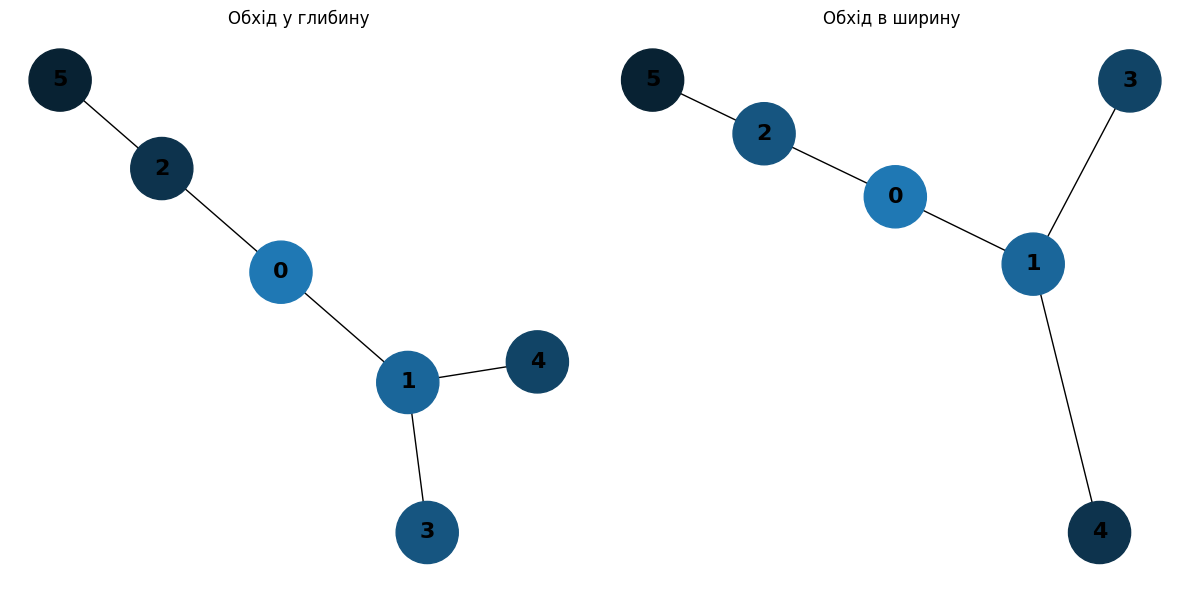

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Створення класу вузла дерева
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Функція для побудови графа дерева
def build_tree_graph(tree_root, graph=None):
    if graph is None:
        graph = nx.Graph()
    graph.add_node(tree_root.value)
    if tree_root.left:
        graph.add_edge(tree_root.value, tree_root.left.value)
        build_tree_graph(tree_root.left, graph)
    if tree_root.right:
        graph.add_edge(tree_root.value, tree_root.right.value)
        build_tree_graph(tree_root.right, graph)
    return graph

# Обхід дерева у глибину
def depth_first_traversal(root, colors, colors_db, index=0):
    if root:
        colors.append(colors_db[index])
        if root.left is not None:
            index = depth_first_traversal(root.left, colors, colors_db, index + 1)
        if root.right is not None:
            index = depth_first_traversal(root.right, colors, colors_db, index + 1)
    return index

# Обхід дерева в ширину
def breadth_first_traversal(root, colors, colors_db):
    queue = [(root, 0)]
    while queue:
        node, depth = queue.pop(0)
        colors.append(colors_db[len(colors)])
        if node.left:
            queue.append((node.left, depth + 1))
        if node.right:
            queue.append((node.right, depth + 1))
    


def generate_color_codes(base_color="#1f78b4", num_colors=8):
    # Перетворюємо базовий колір з рядка у кортеж (R, G, B)
    base_color_rgb = tuple(int(base_color[i:i+2], 16) for i in (1, 3, 5))
    
    # Обчислюємо крок для зміни кольорів
    step = tuple(c / (num_colors - 1) for c in base_color_rgb)
    
    # Генеруємо масив кольорів
    color_codes = []
    for i in range(num_colors):
        new_color = "#{:02x}{:02x}{:02x}".format(*[int(base_color_rgb[j] - step[j] * i) for j in range(3)])
        color_codes.append(new_color)
    
    return color_codes

# Викликаємо функцію для створення масиву з 6 кольорами
colors = generate_color_codes()[:6]
# print(colors)

# Створення дерева
root = Node(0)
root.left = Node(1)
root.right = Node(2)
root.left.left = Node(3)
root.left.right = Node(4)
root.right.left = Node(5)

# Побудова графа дерева
tree_graph = build_tree_graph(root)

# Обхід дерева у глибину та визначення кольорів
depth_colors = []
depth_first_traversal(root, depth_colors, colors)

# Обхід дерева в ширину та визначення кольорів
breadth_colors = []
breadth_first_traversal(root, breadth_colors, colors)
breadth_colors = [breadth_colors[item] for item in tree_graph.nodes]

# Візуалізація графа дерева для обох обходів
plt.figure(figsize=(12, 6))

# Обхід у глибину
plt.subplot(1, 2, 1)
nx.draw(tree_graph, pos=nx.spring_layout(tree_graph), with_labels=True, node_size=2000, node_color=depth_colors, font_size=16, font_weight="bold")

plt.title("Обхід у глибину")

# Обхід в ширину
plt.subplot(1, 2, 2)
nx.draw(tree_graph, pos=nx.spring_layout(tree_graph), with_labels=True, node_size=2000, node_color=breadth_colors, font_size=16, font_weight="bold")
plt.title("Обхід в ширину")

plt.tight_layout()
plt.show()
